In [ ]:
#Name: Jaskaran Singh Purewal
#Roll No. 101917129
#UCS757 Project 1
#Prediction in time series dataset

In [222]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import math

In [223]:
df=pd.read_csv('DATASET1.csv')

In [224]:
df.dtypes

Unnamed: 0      object
year           float64
Para-1         float64
Para-2         float64
Para-3         float64
Para-4         float64
Para-5         float64
Para-6         float64
Para-7         float64
Para-8         float64
Para-9         float64
Para-10        float64
Para-11        float64
Para-12        float64
Para-13        float64
Unnamed: 15    float64
Unnamed: 16    float64
Unnamed: 17    float64
Unnamed: 18    float64
Unnamed: 19    float64
Unnamed: 20    float64
Unnamed: 21    float64
Unnamed: 22    float64
Unnamed: 23    float64
Unnamed: 24    float64
Unnamed: 25    float64
Unnamed: 26    float64
Unnamed: 27    float64
Unnamed: 28    float64
Unnamed: 29    float64
Unnamed: 30    float64
Unnamed: 31    float64
Unnamed: 32    float64
Unnamed: 33    float64
Unnamed: 34    float64
Unnamed: 35    float64
Unnamed: 36    float64
dtype: object

In [225]:
df.columns

Index(['Unnamed: 0', 'year', 'Para-1', 'Para-2', 'Para-3', 'Para-4', 'Para-5',
       'Para-6', 'Para-7', 'Para-8', 'Para-9', 'Para-10', 'Para-11', 'Para-12',
       'Para-13', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30',
       'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34',
       'Unnamed: 35', 'Unnamed: 36'],
      dtype='object')

In [226]:
df.drop(['Unnamed: 0', 'year', 'Para-1', 'Para-2', 'Para-3', 'Para-4', 'Para-5',
       'Para-6', 'Para-7', 'Para-8', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30',
       'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34',
       'Unnamed: 35', 'Unnamed: 36'],axis=1,inplace=True)

In [227]:
df

,Para-9,Para-10,Para-11,Para-12,Para-13
0,0.0,0.0,0.0,0.0,1.520
1,0.0,3.4,0.0,0.0,1.620
2,0.0,21.3,0.0,4.0,1.680
3,0.0,21.3,0.0,5.0,1.780
4,0.0,23.9,0.0,7.0,1.800
...,...,...,...,...,...
1005,24.6,7.9,2.0,15.0,1.838
1006,119.0,15.7,2.0,16.0,1.862
1007,138.2,30.5,6.0,18.0,1.883
1008,293.0,39.8,7.0,18.0,1.889


In [228]:
df.tail(100)

,Para-9,Para-10,Para-11,Para-12,Para-13
910,0.0,8.2,4.0,2.0,0.592
911,0.0,17.2,8.0,2.0,0.618
912,0.0,22.9,9.0,3.0,0.635
913,0.0,34.1,11.0,3.0,0.646
914,0.0,54.4,17.0,6.0,0.664
...,...,...,...,...,...
1005,24.6,7.9,2.0,15.0,1.838
1006,119.0,15.7,2.0,16.0,1.862
1007,138.2,30.5,6.0,18.0,1.883
1008,293.0,39.8,7.0,18.0,1.889


In [229]:
df.drop([910,911,912,913,914,915,916,917,918,1009],axis=0,inplace=True)

In [230]:
df

,Para-9,Para-10,Para-11,Para-12,Para-13
0,0.0,0.0,0.0,0.0,1.520
1,0.0,3.4,0.0,0.0,1.620
2,0.0,21.3,0.0,4.0,1.680
3,0.0,21.3,0.0,5.0,1.780
4,0.0,23.9,0.0,7.0,1.800
...,...,...,...,...,...
1004,15.1,1.8,1.0,15.0,1.681
1005,24.6,7.9,2.0,15.0,1.838
1006,119.0,15.7,2.0,16.0,1.862
1007,138.2,30.5,6.0,18.0,1.883


In [231]:
scaler=StandardScaler()
scaler=scaler.fit(df)
df_scaled=scaler.transform(df)

In [232]:
df_scaled.shape

(1000, 5)

In [233]:
array3d=df_scaled.reshape(100,10,5)
array3d_original=df.values.reshape(100,10,5)

In [234]:
array3d.shape

(100, 10, 5)

In [235]:
# 20 random Sections
test_list=[2,20,27,29,30,36,46,54,60,64,66,67,75,76,78,79,80,81,88,93]

In [236]:
n_future=1
n_past=5

In [237]:
#Preprocessing the data to take 5 rows and predict the next row and Model training with prediction

**Work on Section 3**
Epoch 1/5
1/1 [==============================] - 3s 3s/step - loss: 0.1052 - val_loss: 0.2102
Epoch 2/5
1/1 [==============================] - 0s 35ms/step - loss: 0.1009 - val_loss: 0.1951
Epoch 3/5
1/1 [==============================] - 0s 34ms/step - loss: 0.0816 - val_loss: 0.1808
Epoch 4/5
1/1 [==============================] - 0s 41ms/step - loss: 0.0764 - val_loss: 0.1673
Epoch 5/5
1/1 [==============================] - 0s 39ms/step - loss: 0.0714 - val_loss: 0.1536
Epoch 1/5
1/1 [==============================] - 3s 3s/step - loss: 0.7083 - val_loss: 0.6987
Epoch 2/5
1/1 [==============================] - 0s 34ms/step - loss: 0.6691 - val_loss: 0.6736
Epoch 3/5
1/1 [==============================] - 0s 53ms/step - loss: 0.6545 - val_loss: 0.6491
Epoch 4/5
1/1 [==============================] - 0s 43ms/step - loss: 0.6549 - val_loss: 0.6268
Epoch 5/5
1/1 [==============================] - 0s 46ms/step - loss: 0.5954 - val_loss: 0.6052
Epoch 1/5
1/1 [=======

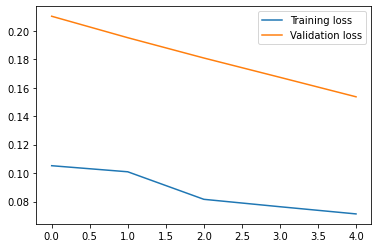

Showing plot for parameter 10:


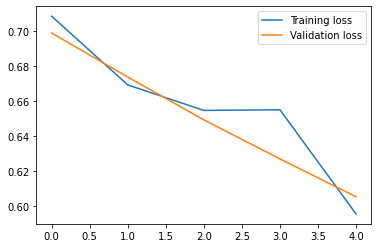

Showing plot for parameter 11:


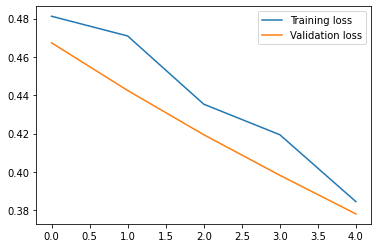

Showing plot for parameter 12:


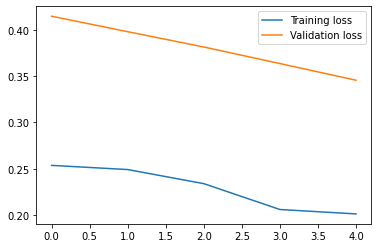

Showing plot for parameter 13:


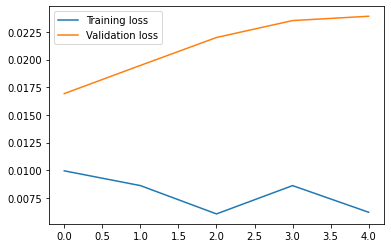

RMSE:35.83485861283421
***********
***********
***********
**Work on Section 21**
Epoch 1/5
1/1 [==============================] - 4s 4s/step - loss: 0.1907 - val_loss: 0.1640
Epoch 2/5
1/1 [==============================] - 0s 40ms/step - loss: 0.1619 - val_loss: 0.1509
Epoch 3/5
1/1 [==============================] - 0s 38ms/step - loss: 0.1466 - val_loss: 0.1392
Epoch 4/5
1/1 [==============================] - 0s 45ms/step - loss: 0.1624 - val_loss: 0.1290
Epoch 5/5
1/1 [==============================] - 0s 39ms/step - loss: 0.1382 - val_loss: 0.1193
Epoch 1/5
1/1 [==============================] - 3s 3s/step - loss: 0.4473 - val_loss: 0.0199
Epoch 2/5
1/1 [==============================] - 0s 39ms/step - loss: 0.4120 - val_loss: 0.0165
Epoch 3/5
1/1 [==============================] - 0s 43ms/step - loss: 0.4052 - val_loss: 0.0135
Epoch 4/5
1/1 [==============================] - 0s 41ms/step - loss: 0.4031 - val_loss: 0.0106
Epoch 5/5
1/1 [==============================] - 0s 40ms/s

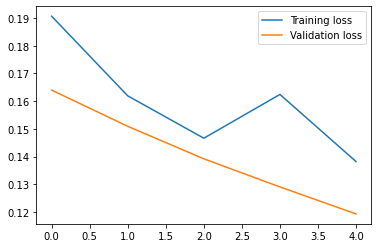

Showing plot for parameter 10:


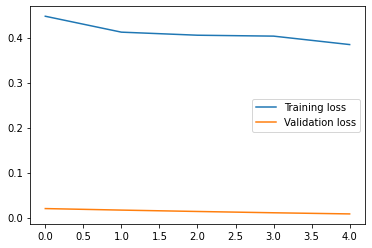

Showing plot for parameter 11:


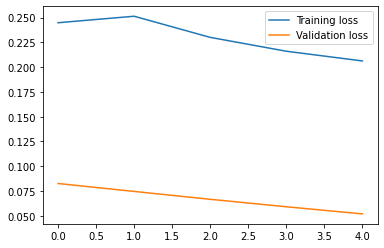

Showing plot for parameter 12:


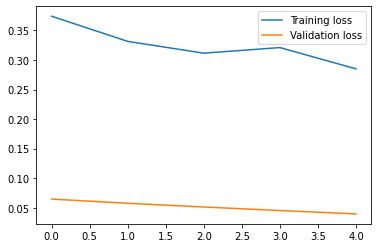

Showing plot for parameter 13:


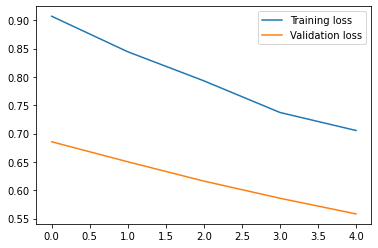

RMSE:39.3847135436458
***********
***********
***********
**Work on Section 28**
Epoch 1/5
1/1 [==============================] - 3s 3s/step - loss: 0.1644 - val_loss: 0.1641
Epoch 2/5
1/1 [==============================] - 0s 59ms/step - loss: 0.1570 - val_loss: 0.1530
Epoch 3/5
1/1 [==============================] - 0s 43ms/step - loss: 0.1454 - val_loss: 0.1413
Epoch 4/5
1/1 [==============================] - 0s 41ms/step - loss: 0.1317 - val_loss: 0.1298
Epoch 5/5
1/1 [==============================] - 0s 69ms/step - loss: 0.1191 - val_loss: 0.1190
Epoch 1/5
1/1 [==============================] - 3s 3s/step - loss: 0.1030 - val_loss: 0.0246
Epoch 2/5
1/1 [==============================] - 0s 42ms/step - loss: 0.0878 - val_loss: 0.0199
Epoch 3/5
1/1 [==============================] - 0s 41ms/step - loss: 0.0782 - val_loss: 0.0158
Epoch 4/5
1/1 [==============================] - 0s 60ms/step - loss: 0.0677 - val_loss: 0.0121
Epoch 5/5
1/1 [==============================] - 0s 39ms/st

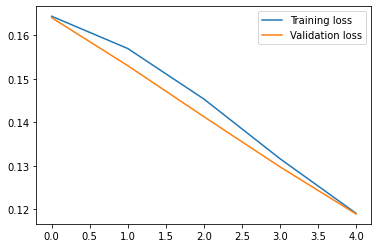

Showing plot for parameter 10:


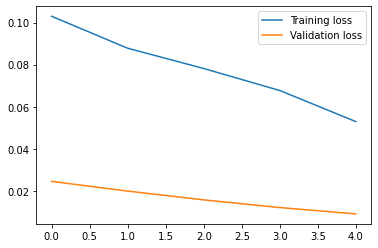

Showing plot for parameter 11:


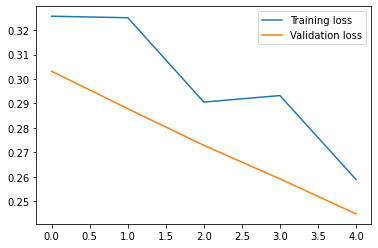

Showing plot for parameter 12:


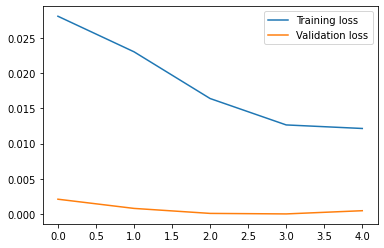

Showing plot for parameter 13:


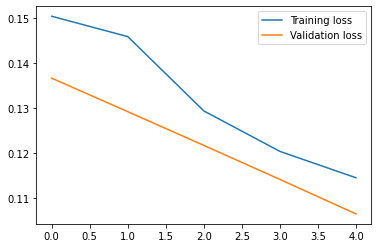

RMSE:37.61263185680406
***********
***********
***********
**Work on Section 30**
Epoch 1/5
1/1 [==============================] - 3s 3s/step - loss: 0.2033 - val_loss: 0.1752
Epoch 2/5
1/1 [==============================] - 0s 49ms/step - loss: 0.1873 - val_loss: 0.1604
Epoch 3/5
1/1 [==============================] - 0s 48ms/step - loss: 0.1776 - val_loss: 0.1457
Epoch 4/5
1/1 [==============================] - 0s 39ms/step - loss: 0.1697 - val_loss: 0.1312
Epoch 5/5
1/1 [==============================] - 0s 42ms/step - loss: 0.1488 - val_loss: 0.1170
Epoch 1/5
1/1 [==============================] - 3s 3s/step - loss: 0.8140 - val_loss: 0.8067
Epoch 2/5
1/1 [==============================] - 0s 77ms/step - loss: 0.8078 - val_loss: 0.7701
Epoch 3/5
1/1 [==============================] - 0s 49ms/step - loss: 0.7869 - val_loss: 0.7372
Epoch 4/5
1/1 [==============================] - 0s 49ms/step - loss: 0.7222 - val_loss: 0.7055
Epoch 5/5
1/1 [==============================] - 0s 82ms/s

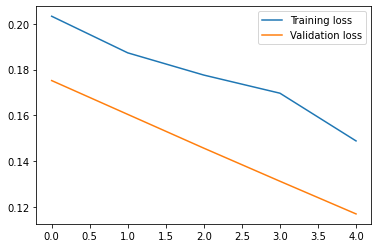

Showing plot for parameter 10:


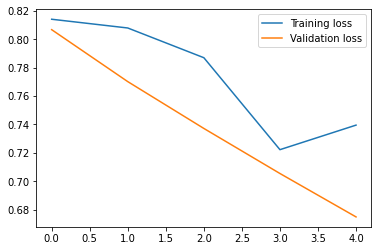

Showing plot for parameter 11:


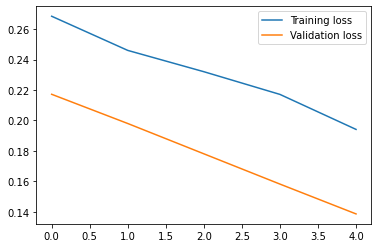

Showing plot for parameter 12:


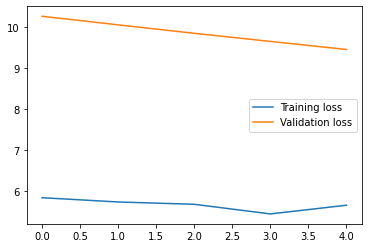

Showing plot for parameter 13:


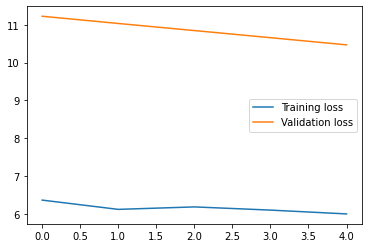

RMSE:19.102930305151613
***********
***********
***********
**Work on Section 31**
Epoch 1/5
1/1 [==============================] - 3s 3s/step - loss: 0.1724 - val_loss: 0.0068
Epoch 2/5
1/1 [==============================] - 0s 49ms/step - loss: 0.1486 - val_loss: 0.0048
Epoch 3/5
1/1 [==============================] - 0s 53ms/step - loss: 0.1453 - val_loss: 0.0031
Epoch 4/5
1/1 [==============================] - 0s 49ms/step - loss: 0.1189 - val_loss: 0.0017
Epoch 5/5
1/1 [==============================] - 0s 46ms/step - loss: 0.1157 - val_loss: 6.1935e-04
Epoch 1/5
1/1 [==============================] - 3s 3s/step - loss: 0.0737 - val_loss: 0.0049
Epoch 2/5
1/1 [==============================] - 0s 48ms/step - loss: 0.0679 - val_loss: 0.0026
Epoch 3/5
1/1 [==============================] - 0s 51ms/step - loss: 0.0506 - val_loss: 0.0010
Epoch 4/5
1/1 [==============================] - 0s 46ms/step - loss: 0.0440 - val_loss: 1.5967e-04
Epoch 5/5
1/1 [==============================] - 

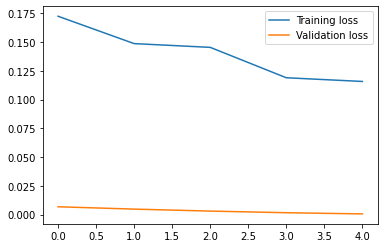

Showing plot for parameter 10:


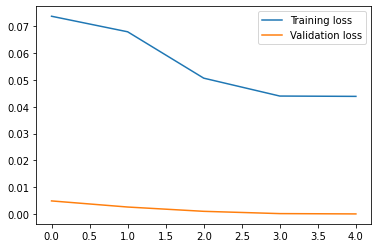

Showing plot for parameter 11:


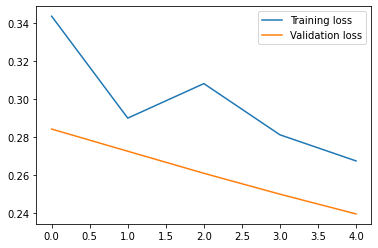

Showing plot for parameter 12:


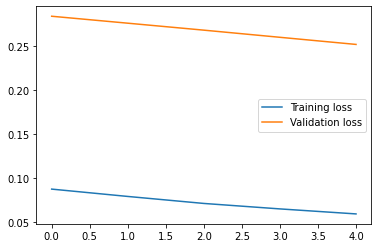

Showing plot for parameter 13:


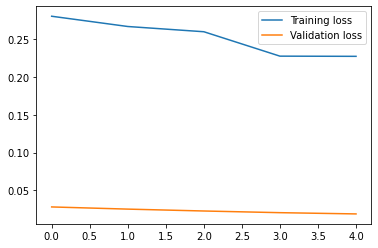

RMSE:39.28677563907027
***********
***********
***********
**Work on Section 37**
Epoch 1/5
1/1 [==============================] - 3s 3s/step - loss: 0.1436 - val_loss: 0.0549
Epoch 2/5
1/1 [==============================] - 0s 46ms/step - loss: 0.1204 - val_loss: 0.0490
Epoch 3/5
1/1 [==============================] - 0s 49ms/step - loss: 0.1242 - val_loss: 0.0441
Epoch 4/5
1/1 [==============================] - 0s 46ms/step - loss: 0.1162 - val_loss: 0.0399
Epoch 5/5
1/1 [==============================] - 0s 53ms/step - loss: 0.1109 - val_loss: 0.0359
Epoch 1/5
1/1 [==============================] - 3s 3s/step - loss: 0.6210 - val_loss: 0.5833
Epoch 2/5
1/1 [==============================] - 0s 48ms/step - loss: 0.6150 - val_loss: 0.5678
Epoch 3/5
1/1 [==============================] - 0s 45ms/step - loss: 0.6111 - val_loss: 0.5531
Epoch 4/5
1/1 [==============================] - 0s 47ms/step - loss: 0.5618 - val_loss: 0.5388
Epoch 5/5
1/1 [==============================] - 0s 44ms/s

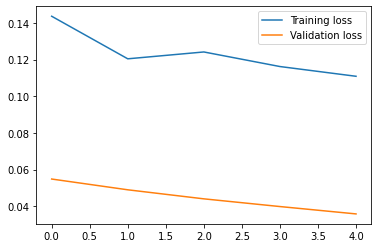

Showing plot for parameter 10:


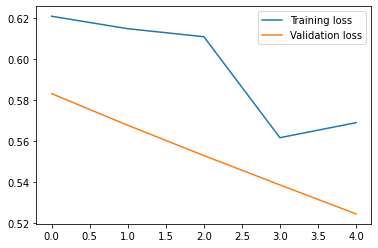

Showing plot for parameter 11:


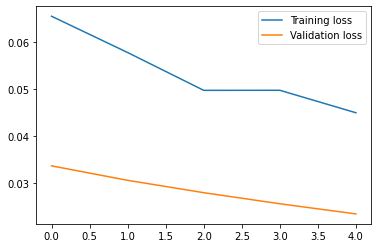

Showing plot for parameter 12:


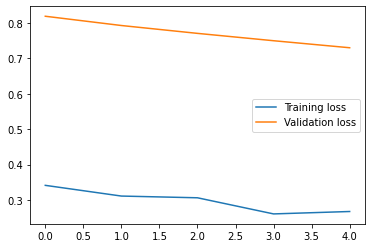

Showing plot for parameter 13:


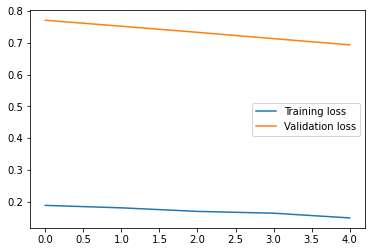

RMSE:15.25523635935199
***********
***********
***********
**Work on Section 47**
Epoch 1/5
1/1 [==============================] - 3s 3s/step - loss: 0.1926 - val_loss: 0.1787
Epoch 2/5
1/1 [==============================] - 0s 50ms/step - loss: 0.1827 - val_loss: 0.1691
Epoch 3/5
1/1 [==============================] - 0s 52ms/step - loss: 0.1649 - val_loss: 0.1612
Epoch 4/5
1/1 [==============================] - 0s 50ms/step - loss: 0.1591 - val_loss: 0.1541
Epoch 5/5
1/1 [==============================] - 0s 49ms/step - loss: 0.1564 - val_loss: 0.1470
Epoch 1/5
1/1 [==============================] - 3s 3s/step - loss: 0.3481 - val_loss: 0.2854
Epoch 2/5
1/1 [==============================] - 0s 49ms/step - loss: 0.3186 - val_loss: 0.2733
Epoch 3/5
1/1 [==============================] - 0s 64ms/step - loss: 0.3195 - val_loss: 0.2621
Epoch 4/5
1/1 [==============================] - 0s 46ms/step - loss: 0.3067 - val_loss: 0.2509
Epoch 5/5
1/1 [==============================] - 0s 53ms/s

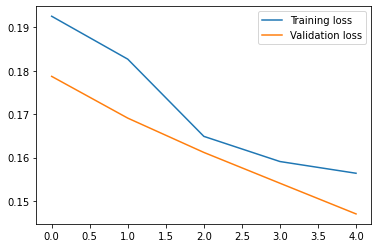

Showing plot for parameter 10:


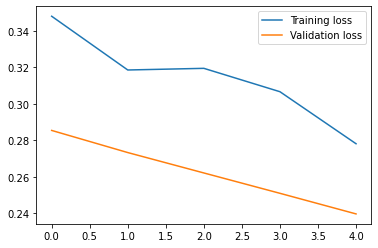

Showing plot for parameter 11:


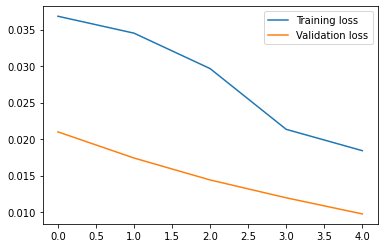

Showing plot for parameter 12:


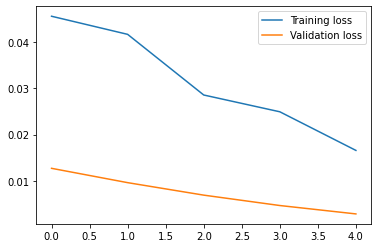

Showing plot for parameter 13:


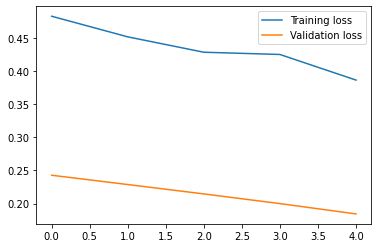

RMSE:17.598601365514913
***********
***********
***********
**Work on Section 55**
Epoch 1/5
1/1 [==============================] - 3s 3s/step - loss: 0.1620 - val_loss: 0.1446
Epoch 2/5
1/1 [==============================] - 0s 51ms/step - loss: 0.1586 - val_loss: 0.1356
Epoch 3/5
1/1 [==============================] - 0s 59ms/step - loss: 0.1512 - val_loss: 0.1273
Epoch 4/5
1/1 [==============================] - 0s 48ms/step - loss: 0.1239 - val_loss: 0.1202
Epoch 5/5
1/1 [==============================] - 0s 60ms/step - loss: 0.1301 - val_loss: 0.1135
Epoch 1/5
1/1 [==============================] - 3s 3s/step - loss: 0.2671 - val_loss: 0.0847
Epoch 2/5
1/1 [==============================] - 0s 50ms/step - loss: 0.2483 - val_loss: 0.0798
Epoch 3/5
1/1 [==============================] - 0s 47ms/step - loss: 0.2414 - val_loss: 0.0754
Epoch 4/5
1/1 [==============================] - 0s 66ms/step - loss: 0.2340 - val_loss: 0.0715
Epoch 5/5
1/1 [==============================] - 0s 52ms/

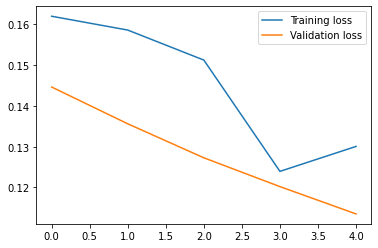

Showing plot for parameter 10:


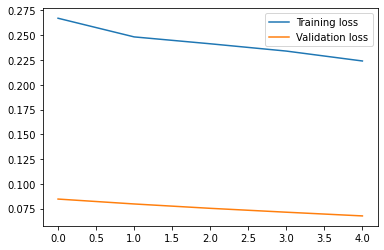

Showing plot for parameter 11:


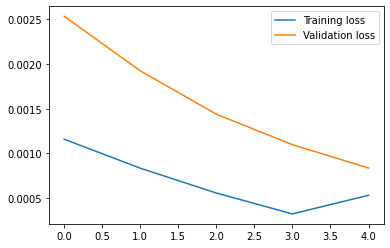

Showing plot for parameter 12:


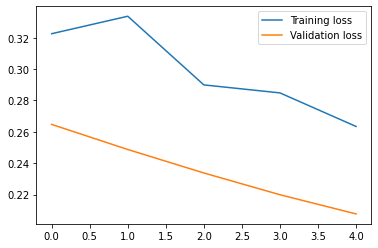

Showing plot for parameter 13:


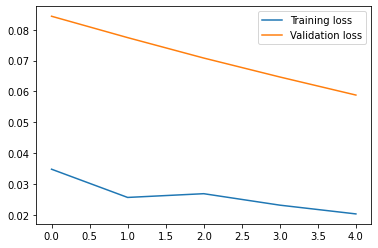

RMSE:38.89035223309434
***********
***********
***********
**Work on Section 61**
Epoch 1/5
1/1 [==============================] - 4s 4s/step - loss: 0.1422 - val_loss: 0.0563
Epoch 2/5
1/1 [==============================] - 0s 111ms/step - loss: 0.1436 - val_loss: 0.0520
Epoch 3/5
1/1 [==============================] - 0s 101ms/step - loss: 0.1229 - val_loss: 0.0478
Epoch 4/5
1/1 [==============================] - 0s 111ms/step - loss: 0.1264 - val_loss: 0.0437
Epoch 5/5
1/1 [==============================] - 0s 168ms/step - loss: 0.1140 - val_loss: 0.0396
Epoch 1/5
1/1 [==============================] - 3s 3s/step - loss: 0.5660 - val_loss: 0.4320
Epoch 2/5
1/1 [==============================] - 0s 52ms/step - loss: 0.5190 - val_loss: 0.4147
Epoch 3/5
1/1 [==============================] - 0s 54ms/step - loss: 0.5058 - val_loss: 0.3974
Epoch 4/5
1/1 [==============================] - 0s 66ms/step - loss: 0.4953 - val_loss: 0.3810
Epoch 5/5
1/1 [==============================] - 0s 61

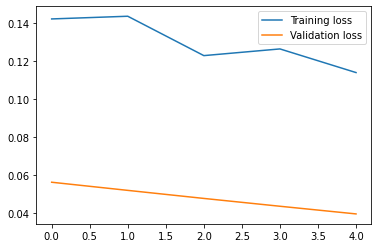

Showing plot for parameter 10:


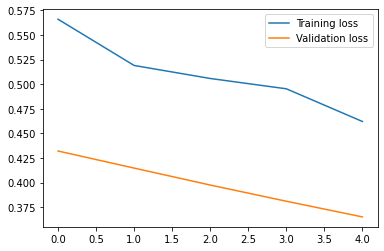

Showing plot for parameter 11:


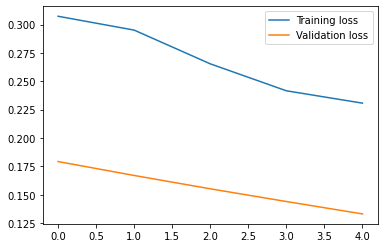

Showing plot for parameter 12:


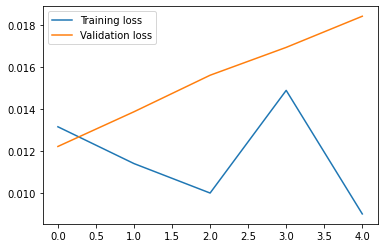

Showing plot for parameter 13:


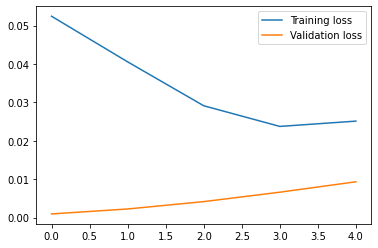

RMSE:15.176792283920829
***********
***********
***********
**Work on Section 65**
Epoch 1/5
1/1 [==============================] - 3s 3s/step - loss: 0.1183 - val_loss: 0.0703
Epoch 2/5
1/1 [==============================] - 0s 55ms/step - loss: 0.1196 - val_loss: 0.0633
Epoch 3/5
1/1 [==============================] - 0s 49ms/step - loss: 0.1102 - val_loss: 0.0569
Epoch 4/5
1/1 [==============================] - 0s 60ms/step - loss: 0.1046 - val_loss: 0.0512
Epoch 5/5
1/1 [==============================] - 0s 46ms/step - loss: 0.0927 - val_loss: 0.0458
Epoch 1/5
1/1 [==============================] - 4s 4s/step - loss: 0.1021 - val_loss: 0.0093
Epoch 2/5
1/1 [==============================] - 0s 56ms/step - loss: 0.0894 - val_loss: 0.0063
Epoch 3/5
1/1 [==============================] - 0s 54ms/step - loss: 0.0822 - val_loss: 0.0040
Epoch 4/5
1/1 [==============================] - 0s 48ms/step - loss: 0.0726 - val_loss: 0.0023
Epoch 5/5
1/1 [==============================] - 0s 47ms/

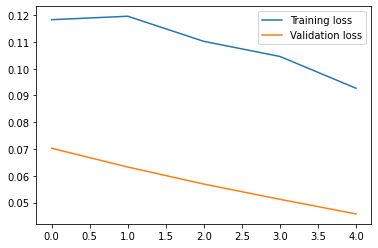

Showing plot for parameter 10:


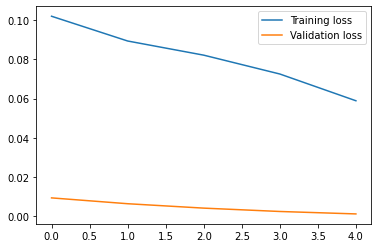

Showing plot for parameter 11:


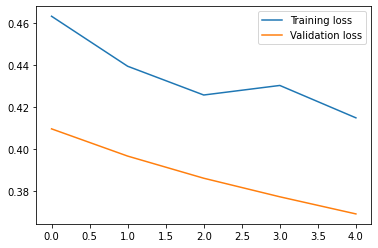

Showing plot for parameter 12:


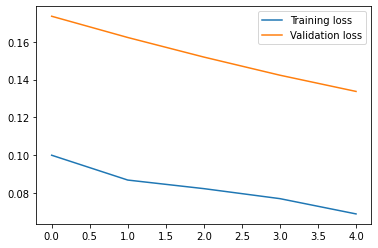

Showing plot for parameter 13:


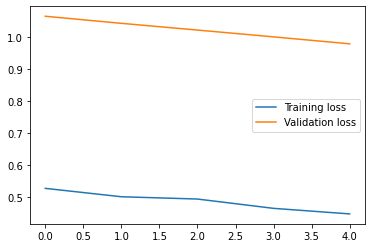

RMSE:39.53619802197069
***********
***********
***********
**Work on Section 67**
Epoch 1/5
1/1 [==============================] - 4s 4s/step - loss: 0.1979 - val_loss: 0.1769
Epoch 2/5
1/1 [==============================] - 0s 57ms/step - loss: 0.1836 - val_loss: 0.1610
Epoch 3/5
1/1 [==============================] - 0s 59ms/step - loss: 0.1666 - val_loss: 0.1486
Epoch 4/5
1/1 [==============================] - 0s 55ms/step - loss: 0.1485 - val_loss: 0.1390
Epoch 5/5
1/1 [==============================] - 0s 48ms/step - loss: 0.1352 - val_loss: 0.1298
Epoch 1/5
1/1 [==============================] - 3s 3s/step - loss: 0.7273 - val_loss: 0.7185
Epoch 2/5
1/1 [==============================] - 0s 56ms/step - loss: 0.7118 - val_loss: 0.6950
Epoch 3/5
1/1 [==============================] - 0s 52ms/step - loss: 0.6848 - val_loss: 0.6717
Epoch 4/5
1/1 [==============================] - 0s 53ms/step - loss: 0.6727 - val_loss: 0.6479
Epoch 5/5
1/1 [==============================] - 0s 53ms/s

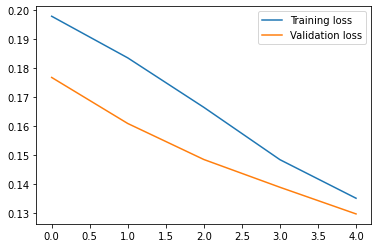

Showing plot for parameter 10:


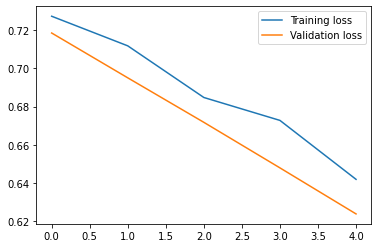

Showing plot for parameter 11:


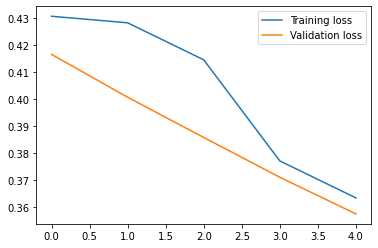

Showing plot for parameter 12:


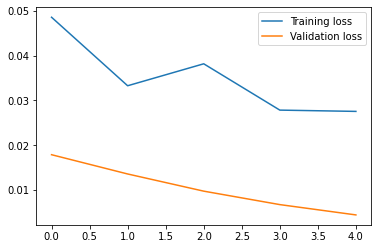

Showing plot for parameter 13:


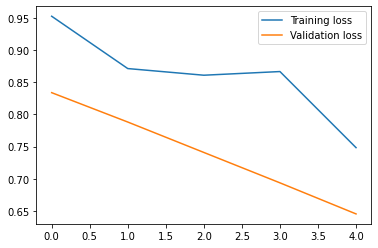

RMSE:3.194662640033884
***********
***********
***********
**Work on Section 68**
Epoch 1/5
1/1 [==============================] - 3s 3s/step - loss: 0.1014 - val_loss: 0.0226
Epoch 2/5
1/1 [==============================] - 0s 73ms/step - loss: 0.1068 - val_loss: 0.0192
Epoch 3/5
1/1 [==============================] - 0s 57ms/step - loss: 0.0785 - val_loss: 0.0162
Epoch 4/5
1/1 [==============================] - 0s 58ms/step - loss: 0.0756 - val_loss: 0.0135
Epoch 5/5
1/1 [==============================] - 0s 52ms/step - loss: 0.0666 - val_loss: 0.0111
Epoch 1/5
1/1 [==============================] - 3s 3s/step - loss: 0.5546 - val_loss: 0.5242
Epoch 2/5
1/1 [==============================] - 0s 56ms/step - loss: 0.5818 - val_loss: 0.5039
Epoch 3/5
1/1 [==============================] - 0s 55ms/step - loss: 0.4973 - val_loss: 0.4834
Epoch 4/5
1/1 [==============================] - 0s 55ms/step - loss: 0.5214 - val_loss: 0.4626
Epoch 5/5
1/1 [==============================] - 0s 58ms/s

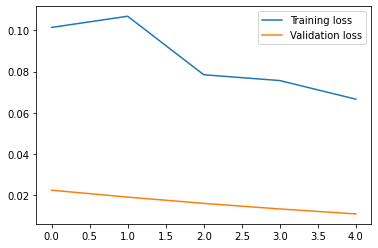

Showing plot for parameter 10:


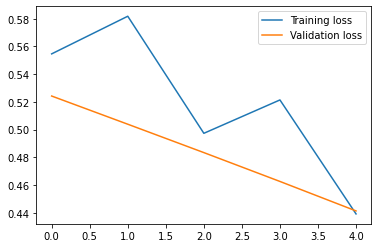

Showing plot for parameter 11:


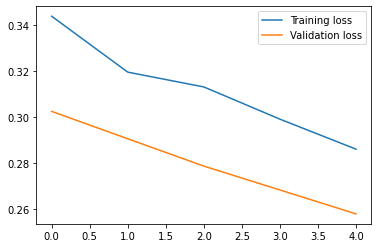

Showing plot for parameter 12:


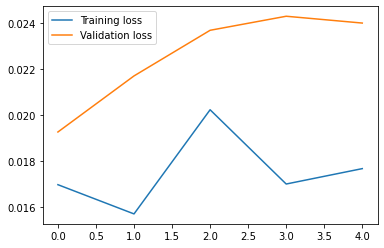

Showing plot for parameter 13:


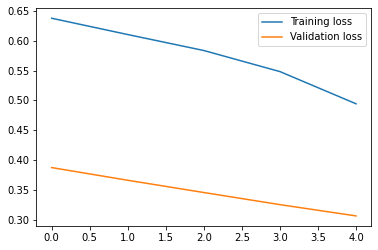

RMSE:14.266581852134331
***********
***********
***********
**Work on Section 76**
Epoch 1/5
1/1 [==============================] - 3s 3s/step - loss: 0.1983 - val_loss: 0.1635
Epoch 2/5
1/1 [==============================] - 0s 51ms/step - loss: 0.1697 - val_loss: 0.1531
Epoch 3/5
1/1 [==============================] - 0s 49ms/step - loss: 0.1760 - val_loss: 0.1434
Epoch 4/5
1/1 [==============================] - 0s 68ms/step - loss: 0.1392 - val_loss: 0.1343
Epoch 5/5
1/1 [==============================] - 0s 52ms/step - loss: 0.1554 - val_loss: 0.1259
Epoch 1/5
1/1 [==============================] - 3s 3s/step - loss: 0.7885 - val_loss: 0.7520
Epoch 2/5
1/1 [==============================] - 0s 55ms/step - loss: 0.7503 - val_loss: 0.7323
Epoch 3/5
1/1 [==============================] - 0s 54ms/step - loss: 0.7519 - val_loss: 0.7152
Epoch 4/5
1/1 [==============================] - 0s 53ms/step - loss: 0.6978 - val_loss: 0.6990
Epoch 5/5
1/1 [==============================] - 0s 51ms/

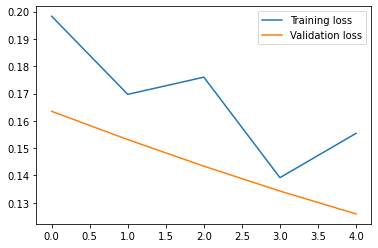

Showing plot for parameter 10:


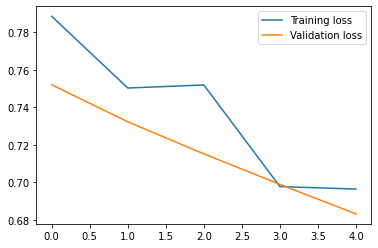

Showing plot for parameter 11:


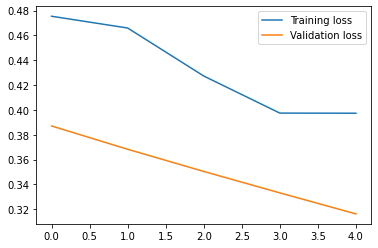

Showing plot for parameter 12:


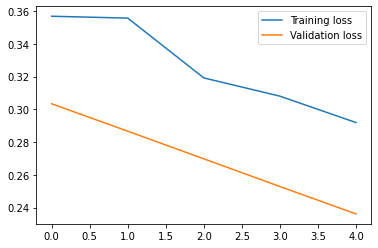

Showing plot for parameter 13:


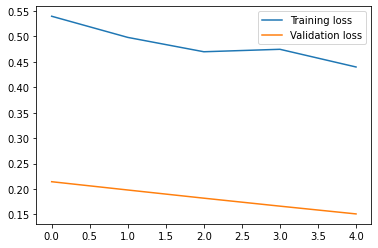

RMSE:2.779442185911391
***********
***********
***********
**Work on Section 77**
Epoch 1/5
1/1 [==============================] - 3s 3s/step - loss: 0.2112 - val_loss: 0.1508
Epoch 2/5
1/1 [==============================] - 0s 51ms/step - loss: 0.1938 - val_loss: 0.1377
Epoch 3/5
1/1 [==============================] - 0s 75ms/step - loss: 0.1806 - val_loss: 0.1277
Epoch 4/5
1/1 [==============================] - 0s 48ms/step - loss: 0.1683 - val_loss: 0.1202
Epoch 5/5
1/1 [==============================] - 0s 50ms/step - loss: 0.1681 - val_loss: 0.1136
Epoch 1/5
1/1 [==============================] - 4s 4s/step - loss: 0.7158 - val_loss: 0.4827
Epoch 2/5
1/1 [==============================] - 0s 51ms/step - loss: 0.7285 - val_loss: 0.4628
Epoch 3/5
1/1 [==============================] - 0s 65ms/step - loss: 0.6967 - val_loss: 0.4440
Epoch 4/5
1/1 [==============================] - 0s 69ms/step - loss: 0.6893 - val_loss: 0.4278
Epoch 5/5
1/1 [==============================] - 0s 51ms/s

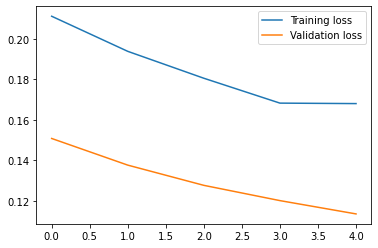

Showing plot for parameter 10:


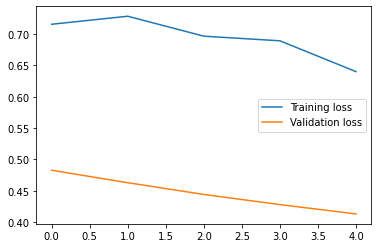

Showing plot for parameter 11:


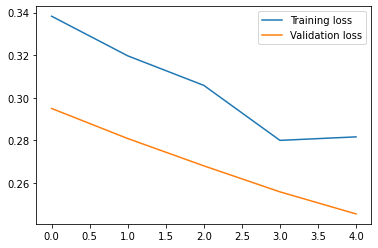

Showing plot for parameter 12:


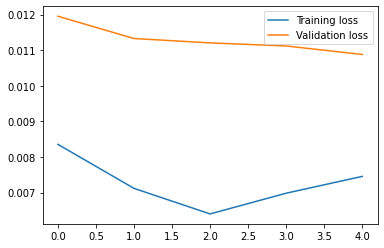

Showing plot for parameter 13:


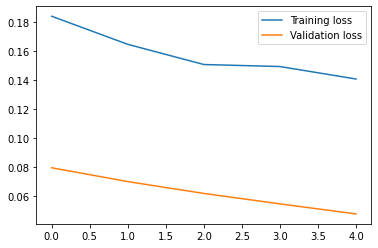

RMSE:9.013602287334551
***********
***********
***********
**Work on Section 79**
Epoch 1/5
1/1 [==============================] - 4s 4s/step - loss: 0.2007 - val_loss: 0.1938
Epoch 2/5
1/1 [==============================] - 0s 54ms/step - loss: 0.1880 - val_loss: 0.1809
Epoch 3/5
1/1 [==============================] - 0s 53ms/step - loss: 0.1851 - val_loss: 0.1686
Epoch 4/5
1/1 [==============================] - 0s 73ms/step - loss: 0.1688 - val_loss: 0.1572
Epoch 5/5
1/1 [==============================] - 0s 55ms/step - loss: 0.1638 - val_loss: 0.1463
Epoch 1/5
1/1 [==============================] - 3s 3s/step - loss: 0.6980 - val_loss: 0.6324
Epoch 2/5
1/1 [==============================] - 0s 59ms/step - loss: 0.6278 - val_loss: 0.5909
Epoch 3/5
1/1 [==============================] - 0s 56ms/step - loss: 0.5966 - val_loss: 0.5497
Epoch 4/5
1/1 [==============================] - 0s 52ms/step - loss: 0.5676 - val_loss: 0.5098
Epoch 5/5
1/1 [==============================] - 0s 70ms/s

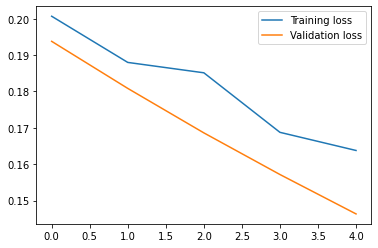

Showing plot for parameter 10:


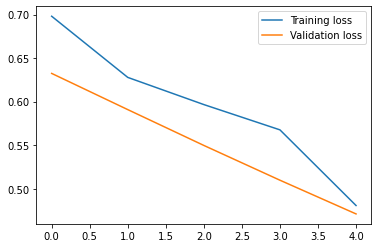

Showing plot for parameter 11:


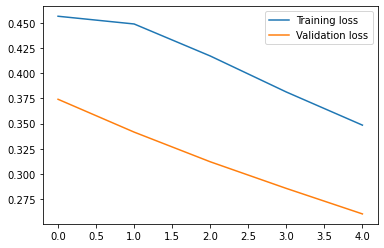

Showing plot for parameter 12:


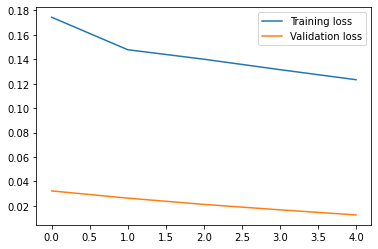

Showing plot for parameter 13:


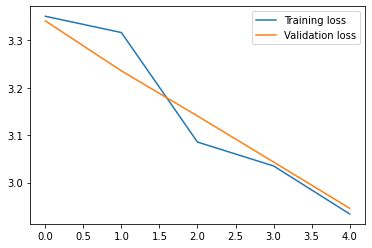

RMSE:3.414924897488151
***********
***********
***********
**Work on Section 80**
Epoch 1/5
1/1 [==============================] - 3s 3s/step - loss: 0.1928 - val_loss: 0.1663
Epoch 2/5
1/1 [==============================] - 0s 78ms/step - loss: 0.1721 - val_loss: 0.1481
Epoch 3/5
1/1 [==============================] - 0s 59ms/step - loss: 0.1690 - val_loss: 0.1310
Epoch 4/5
1/1 [==============================] - 0s 48ms/step - loss: 0.1361 - val_loss: 0.1148
Epoch 5/5
1/1 [==============================] - 0s 51ms/step - loss: 0.1233 - val_loss: 0.0995
Epoch 1/5
1/1 [==============================] - 3s 3s/step - loss: 0.7607 - val_loss: 0.7177
Epoch 2/5
1/1 [==============================] - 0s 73ms/step - loss: 0.7284 - val_loss: 0.6971
Epoch 3/5
1/1 [==============================] - 0s 51ms/step - loss: 0.7045 - val_loss: 0.6775
Epoch 4/5
1/1 [==============================] - 0s 49ms/step - loss: 0.7035 - val_loss: 0.6586
Epoch 5/5
1/1 [==============================] - 0s 49ms/s

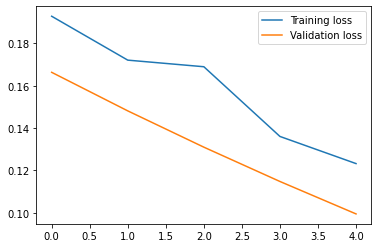

Showing plot for parameter 10:


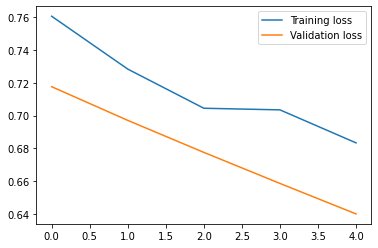

Showing plot for parameter 11:


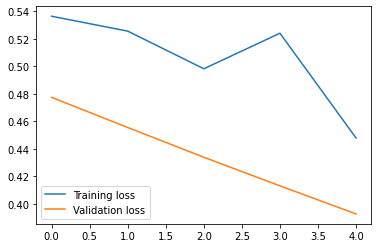

Showing plot for parameter 12:


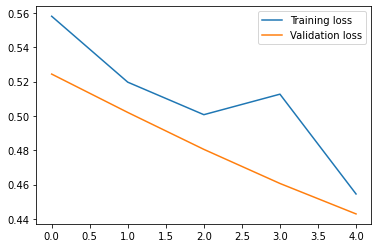

Showing plot for parameter 13:


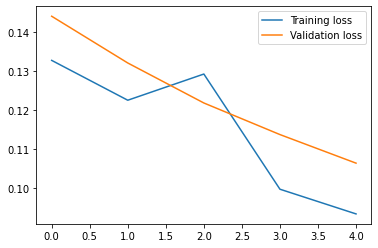

RMSE:1.6232180634704843
***********
***********
***********
**Work on Section 81**
Epoch 1/5
1/1 [==============================] - 3s 3s/step - loss: 0.1759 - val_loss: 0.1581
Epoch 2/5
1/1 [==============================] - 0s 59ms/step - loss: 0.1640 - val_loss: 0.1446
Epoch 3/5
1/1 [==============================] - 0s 50ms/step - loss: 0.1668 - val_loss: 0.1316
Epoch 4/5
1/1 [==============================] - 0s 66ms/step - loss: 0.1382 - val_loss: 0.1191
Epoch 5/5
1/1 [==============================] - 0s 48ms/step - loss: 0.1277 - val_loss: 0.1074
Epoch 1/5
1/1 [==============================] - 3s 3s/step - loss: 0.3980 - val_loss: 0.2685
Epoch 2/5
1/1 [==============================] - 0s 53ms/step - loss: 0.3896 - val_loss: 0.2534
Epoch 3/5
1/1 [==============================] - 0s 49ms/step - loss: 0.3708 - val_loss: 0.2385
Epoch 4/5
1/1 [==============================] - 0s 46ms/step - loss: 0.3596 - val_loss: 0.2253
Epoch 5/5
1/1 [==============================] - 0s 47ms/

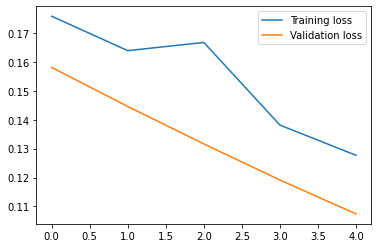

Showing plot for parameter 10:


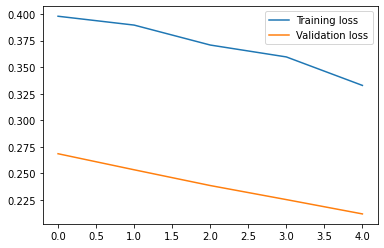

Showing plot for parameter 11:


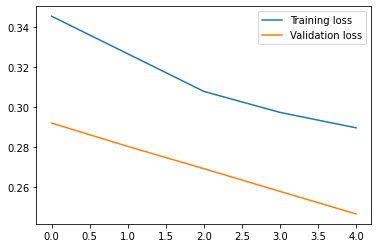

Showing plot for parameter 12:


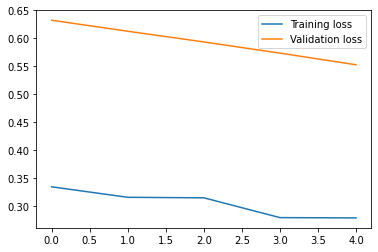

Showing plot for parameter 13:


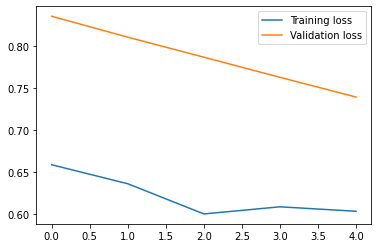

RMSE:19.29476592462051
***********
***********
***********
**Work on Section 82**
Epoch 1/5
1/1 [==============================] - 3s 3s/step - loss: 0.1744 - val_loss: 0.1630
Epoch 2/5
1/1 [==============================] - 0s 58ms/step - loss: 0.1666 - val_loss: 0.1554
Epoch 3/5
1/1 [==============================] - 0s 50ms/step - loss: 0.1539 - val_loss: 0.1480
Epoch 4/5
1/1 [==============================] - 0s 74ms/step - loss: 0.1594 - val_loss: 0.1410
Epoch 5/5
1/1 [==============================] - 0s 74ms/step - loss: 0.1332 - val_loss: 0.1345
Epoch 1/5
1/1 [==============================] - 3s 3s/step - loss: 0.3638 - val_loss: 0.1999
Epoch 2/5
1/1 [==============================] - 0s 67ms/step - loss: 0.3587 - val_loss: 0.1904
Epoch 3/5
1/1 [==============================] - 0s 70ms/step - loss: 0.3495 - val_loss: 0.1811
Epoch 4/5
1/1 [==============================] - 0s 77ms/step - loss: 0.3246 - val_loss: 0.1726
Epoch 5/5
1/1 [==============================] - 0s 69ms/s

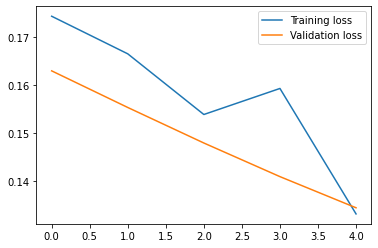

Showing plot for parameter 10:


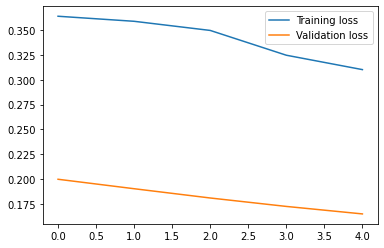

Showing plot for parameter 11:


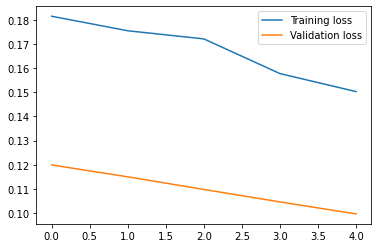

Showing plot for parameter 12:


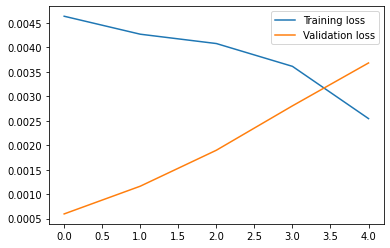

Showing plot for parameter 13:


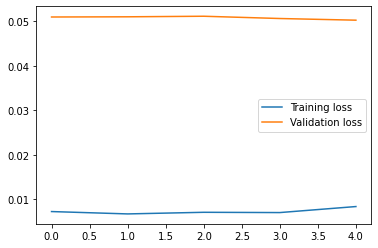

RMSE:22.123639213705687
***********
***********
***********
**Work on Section 89**
Epoch 1/5
1/1 [==============================] - 3s 3s/step - loss: 0.1875 - val_loss: 0.1560
Epoch 2/5
1/1 [==============================] - 0s 52ms/step - loss: 0.1649 - val_loss: 0.1438
Epoch 3/5
1/1 [==============================] - 0s 50ms/step - loss: 0.1606 - val_loss: 0.1322
Epoch 4/5
1/1 [==============================] - 0s 67ms/step - loss: 0.1529 - val_loss: 0.1212
Epoch 5/5
1/1 [==============================] - 0s 63ms/step - loss: 0.1396 - val_loss: 0.1106
Epoch 1/5
1/1 [==============================] - 4s 4s/step - loss: 0.6489 - val_loss: 0.6265
Epoch 2/5
1/1 [==============================] - 0s 62ms/step - loss: 0.6271 - val_loss: 0.6121
Epoch 3/5
1/1 [==============================] - 0s 69ms/step - loss: 0.6249 - val_loss: 0.5989
Epoch 4/5
1/1 [==============================] - 0s 54ms/step - loss: 0.6164 - val_loss: 0.5862
Epoch 5/5
1/1 [==============================] - 0s 60ms/

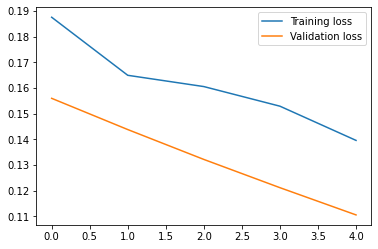

Showing plot for parameter 10:


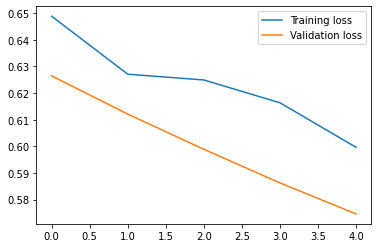

Showing plot for parameter 11:


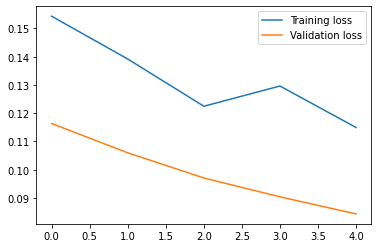

Showing plot for parameter 12:


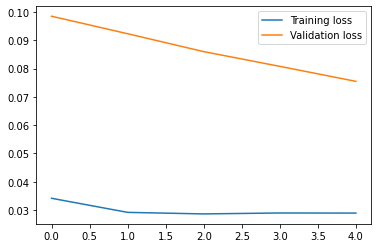

Showing plot for parameter 13:


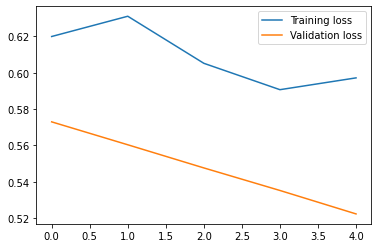

RMSE:9.509433349414207
***********
***********
***********
**Work on Section 94**
Epoch 1/5
1/1 [==============================] - 4s 4s/step - loss: 0.1362 - val_loss: 0.1239
Epoch 2/5
1/1 [==============================] - 0s 63ms/step - loss: 0.1339 - val_loss: 0.1101
Epoch 3/5
1/1 [==============================] - 0s 58ms/step - loss: 0.1196 - val_loss: 0.0963
Epoch 4/5
1/1 [==============================] - 0s 72ms/step - loss: 0.0884 - val_loss: 0.0829
Epoch 5/5
1/1 [==============================] - 0s 96ms/step - loss: 0.0927 - val_loss: 0.0702
Epoch 1/5
1/1 [==============================] - 3s 3s/step - loss: 0.0576 - val_loss: 0.0038
Epoch 2/5
1/1 [==============================] - 0s 54ms/step - loss: 0.0503 - val_loss: 0.0021
Epoch 3/5
1/1 [==============================] - 0s 50ms/step - loss: 0.0383 - val_loss: 9.0681e-04
Epoch 4/5
1/1 [==============================] - 0s 52ms/step - loss: 0.0372 - val_loss: 2.0143e-04
Epoch 5/5
1/1 [==============================] - 0

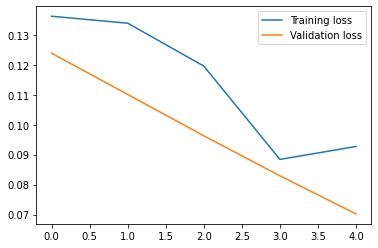

Showing plot for parameter 10:


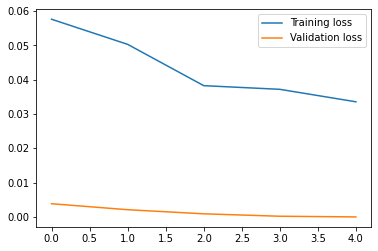

Showing plot for parameter 11:


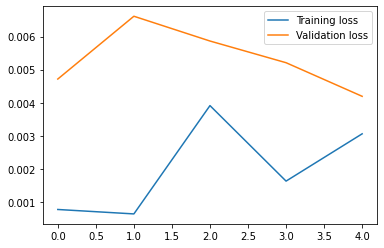

Showing plot for parameter 12:


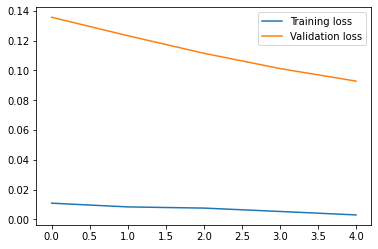

Showing plot for parameter 13:


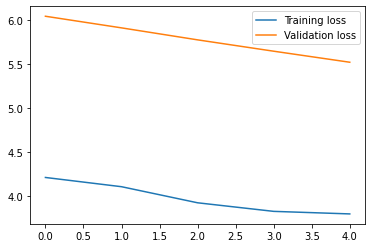

RMSE:39.31216211934945
***********
***********
***********


In [238]:
avg_rmse=0
for x in test_list:
  data_particular=array3d[x][:][:9]
  test_data_row=array3d_original[x][:][9]
  trainX=[]
  trainY_9=[]
  trainY_10=[]
  trainY_11=[]
  trainY_12=[]
  trainY_13=[]
  for i in range(n_past, len(data_particular) - n_future +1):
    trainX.append(data_particular[i - n_past:i, 0:data_particular.shape[1]])
    trainY_9.append(data_particular[i + n_future - 1:i + n_future, 0])
    trainY_10.append(data_particular[i + n_future - 1:i + n_future, 1])
    trainY_11.append(data_particular[i + n_future - 1:i + n_future, 2])
    trainY_12.append(data_particular[i + n_future - 1:i + n_future, 3])
    trainY_13.append(data_particular[i + n_future - 1:i + n_future, 4])
  trainX, trainY_9, trainY_10, trainY_11, trainY_12, trainY_13 = np.array(trainX), np.array(trainY_9), np.array(trainY_10), np.array(trainY_11), np.array(trainY_12), np.array(trainY_13)
  print("**Work on Section {}**".format(x+1))

  model1 = Sequential()
  model1.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
  model1.add(LSTM(32, activation='relu', return_sequences=False))
  model1.add(Dropout(0.2))
  model1.add(Dense(trainY_9.shape[1]))
  model1.compile(optimizer='adam', loss='mse')
  model2 = Sequential()
  model2.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
  model2.add(LSTM(32, activation='relu', return_sequences=False))
  model2.add(Dropout(0.2))
  model2.add(Dense(trainY_9.shape[1]))
  model2.compile(optimizer='adam', loss='mse')
  model3 = Sequential()
  model3.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
  model3.add(LSTM(32, activation='relu', return_sequences=False))
  model3.add(Dropout(0.2))
  model3.add(Dense(trainY_9.shape[1]))
  model3.compile(optimizer='adam', loss='mse')
  model4 = Sequential()
  model4.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
  model4.add(LSTM(32, activation='relu', return_sequences=False))
  model4.add(Dropout(0.2))
  model4.add(Dense(trainY_9.shape[1]))
  model4.compile(optimizer='adam', loss='mse')
  model5 = Sequential()
  model5.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
  model5.add(LSTM(32, activation='relu', return_sequences=False))
  model5.add(Dropout(0.2))
  model5.add(Dense(trainY_9.shape[1]))
  model5.compile(optimizer='adam', loss='mse')
  history_9 = model1.fit(trainX, trainY_9, epochs=5, validation_split=0.1, verbose=1)
  history_10 = model2.fit(trainX, trainY_10, epochs=5, validation_split=0.1, verbose=1)
  history_11 = model3.fit(trainX, trainY_11, epochs=5, validation_split=0.1, verbose=1)
  history_12 = model4.fit(trainX, trainY_12, epochs=5, validation_split=0.1, verbose=1)
  history_13 = model5.fit(trainX, trainY_13, epochs=5, validation_split=0.1, verbose=1)

  print("Showing plot for parameter 9:")
  plt.figure()
  plt.plot(history_9.history['loss'], label='Training loss')
  plt.plot(history_9.history['val_loss'], label='Validation loss')
  plt.legend()
  plt.show()

  print("Showing plot for parameter 10:")
  plt.figure()
  plt.plot(history_10.history['loss'], label='Training loss')
  plt.plot(history_10.history['val_loss'], label='Validation loss')
  plt.legend()
  plt.show()

  print("Showing plot for parameter 11:")
  plt.figure()
  plt.plot(history_11.history['loss'], label='Training loss')
  plt.plot(history_11.history['val_loss'], label='Validation loss')
  plt.legend()
  plt.show()
  print("Showing plot for parameter 12:")
  plt.figure()
  plt.plot(history_12.history['loss'], label='Training loss')
  plt.plot(history_12.history['val_loss'], label='Validation loss')
  plt.legend()
  plt.show()

  print("Showing plot for parameter 13:")
  plt.figure()
  plt.plot(history_13.history['loss'], label='Training loss')
  plt.plot(history_13.history['val_loss'], label='Validation loss')
  plt.legend()
  plt.show()
  
  

  predict_9=model1.predict(trainX[-1:])
  prediction_copies9 = np.repeat(predict_9, data_particular.shape[1], axis=-1)
  y_pred_future_9 = scaler.inverse_transform(prediction_copies9)[:,0]

  predict_10=model2.predict(trainX[-1:])
  prediction_copies10 = np.repeat(predict_10, data_particular.shape[1], axis=-1)
  y_pred_future_10 = scaler.inverse_transform(prediction_copies10)[:,0]

  predict_11=model3.predict(trainX[-1:])
  prediction_copies11 = np.repeat(predict_11, data_particular.shape[1], axis=-1)
  y_pred_future_11 = scaler.inverse_transform(prediction_copies11)[:,0]
  
  predict_12=model4.predict(trainX[-1:])
  prediction_copies12 = np.repeat(predict_12, data_particular.shape[1], axis=-1)
  y_pred_future_12 = scaler.inverse_transform(prediction_copies12)[:,0]
  
  predict_13=model5.predict(trainX[-1:])
  prediction_copies13 = np.repeat(predict_13, data_particular.shape[1], axis=-1)
  y_pred_future_13 = scaler.inverse_transform(prediction_copies13)[:,0]


  predict_output=[]
  predict_output.append(predict_9)
  predict_output.append(predict_10)
  predict_output.append(predict_11)
  predict_output.append(predict_12)
  predict_output.append(predict_13)

  MSE = np.square(np.subtract(predict_output,test_data_row)).mean()
  rmse=math.sqrt(MSE)
  print("RMSE:{}".format(rmse))
  avg_rmse+=rmse

  print("***********")
  print("***********")
  print("***********")
avg_rmse=avg_rmse/len(test_list)

In [239]:
print("Avergae RMSE for 20 random Sections: {}".format(avg_rmse))

Avergae RMSE for 20 random Sections: 21.110576137741067
